(60000, 28, 28)
Epoch 1/20


2023-02-08 17:06:03.115958: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 156800000 exceeds 10% of free system memory.
2023-02-08 17:06:03.211251: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 156800000 exceeds 10% of free system memory.


3125/3125 [==============================] - 5s 2ms/step - loss: 1.5240 - accuracy: 0.4125 - val_loss: 0.9055 - val_accuracy: 0.6520
Epoch 2/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.7251 - accuracy: 0.7331 - val_loss: 0.6459 - val_accuracy: 0.7750
Epoch 3/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.5603 - accuracy: 0.7983 - val_loss: 0.5351 - val_accuracy: 0.8136
Epoch 4/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.4996 - accuracy: 0.8212 - val_loss: 0.4956 - val_accuracy: 0.8255
Epoch 5/20
3125/3125 [==============================] - 4s 1ms/step - loss: 0.4570 - accuracy: 0.8354 - val_loss: 0.4505 - val_accuracy: 0.8393
Epoch 6/20
3125/3125 [==============================] - 5s 1ms/step - loss: 0.4230 - accuracy: 0.8473 - val_loss: 0.4285 - val_accuracy: 0.8510
Epoch 7/20
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3982 - accuracy: 0.8557 - val_loss: 0.4131 - val_accuracy: 0.8564
Epo

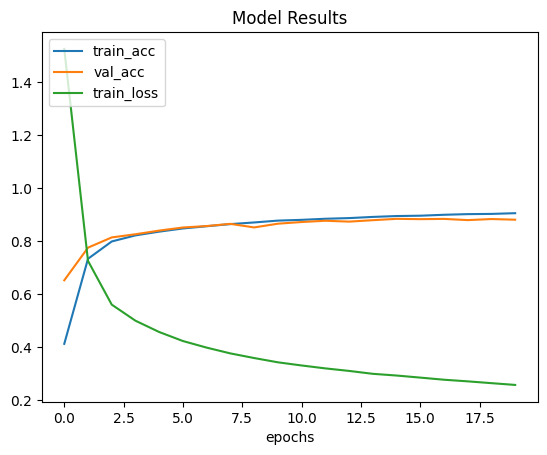

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Input, layers
import pandas as pd
from d2l import tensorflow as d2l


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#scaling image values
train_images = train_images / 255
test_images = test_images / 255
print(train_images.shape)

x_val = train_images[-10000:]
y_val = train_labels[-10000:]

x_train = train_images[:-10000]
y_train = train_labels[:-10000]


#My Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu',
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dense(128, activation='relu', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dense(64, activation='relu', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dense(10) ])

#Compile the model
model.compile(optimizer='SGD', 
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

#Train Model
history = model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

model.save_weights('BaseModel.params')

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Results')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')
plt.show()

Epoch 1/20


2023-02-08 17:07:42.969479: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 156800000 exceeds 10% of free system memory.


3125/3125 [==============================] - 6s 2ms/step - loss: 1.7783 - accuracy: 0.4161 - val_loss: 1.0463 - val_accuracy: 0.6745
Epoch 2/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.9667 - accuracy: 0.7157 - val_loss: 0.8945 - val_accuracy: 0.7389
Epoch 3/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.8711 - accuracy: 0.7471 - val_loss: 0.8284 - val_accuracy: 0.7602
Epoch 4/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.8301 - accuracy: 0.7571 - val_loss: 0.8228 - val_accuracy: 0.7574
Epoch 5/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.7989 - accuracy: 0.7712 - val_loss: 0.7730 - val_accuracy: 0.7834
Epoch 6/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.7577 - accuracy: 0.7913 - val_loss: 0.7609 - val_accuracy: 0.7802
Epoch 7/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.7278 - accuracy: 0.8053 - val_loss: 0.7170 - val_accuracy: 0.8108
Epo

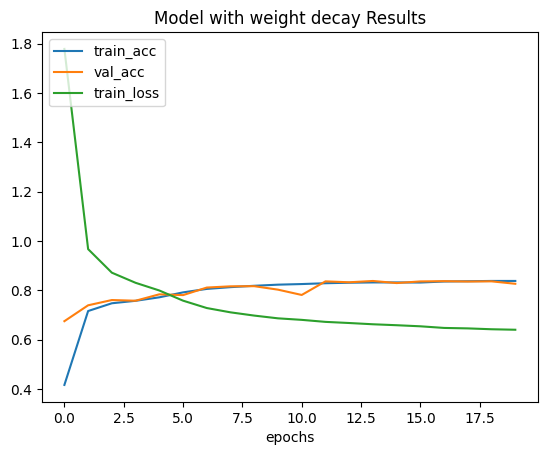

In [3]:
#******************************88
#Model 2 with
model_weightdecay = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu', 
        kernel_regularizer='l2', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dense(128, activation='relu', 
        kernel_regularizer='l2', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dense(64, activation='relu', 
        kernel_regularizer='l2', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dense(10) ])

model_weightdecay.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

history = model_weightdecay.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Model with weight decay Results')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')
plt.show()

Epoch 1/20
3125/3125 [==============================] - 5s 2ms/step - loss: 1.7600 - accuracy: 0.3324 - val_loss: 0.9147 - val_accuracy: 0.6673
Epoch 2/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.8802 - accuracy: 0.6745 - val_loss: 0.6782 - val_accuracy: 0.7604
Epoch 3/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6908 - accuracy: 0.7511 - val_loss: 0.5652 - val_accuracy: 0.7960
Epoch 4/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6011 - accuracy: 0.7832 - val_loss: 0.5182 - val_accuracy: 0.8069
Epoch 5/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.5527 - accuracy: 0.8021 - val_loss: 0.4749 - val_accuracy: 0.8298
Epoch 6/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.5136 - accuracy: 0.8201 - val_loss: 0.4387 - val_accuracy: 0.8446
Epoch 7/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.4826 - accuracy: 0.8310 - val_loss: 0.4208 - val_accuracy:

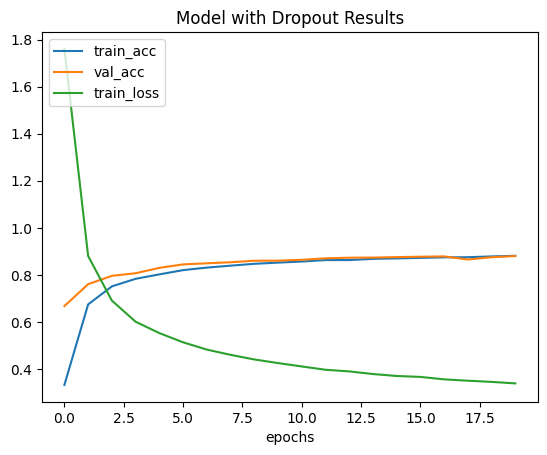

In [4]:
#******************************88
#Model 3 with dropout
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10) ])

model_dropout.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

history = model_dropout.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Model with Dropout Results')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')
plt.show()

Epoch 1/20
3125/3125 [==============================] - 6s 2ms/step - loss: 1.3349 - accuracy: 0.8972 - val_loss: 1.0029 - val_accuracy: 0.8622
Epoch 2/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.8426 - accuracy: 0.8683 - val_loss: 0.7766 - val_accuracy: 0.8526
Epoch 3/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.7253 - accuracy: 0.8540 - val_loss: 0.7073 - val_accuracy: 0.8470
Epoch 4/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6871 - accuracy: 0.8483 - val_loss: 0.6876 - val_accuracy: 0.8387
Epoch 5/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6689 - accuracy: 0.8474 - val_loss: 0.6646 - val_accuracy: 0.8468
Epoch 6/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6599 - accuracy: 0.8464 - val_loss: 0.7141 - val_accuracy: 0.8225
Epoch 7/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6510 - accuracy: 0.8452 - val_loss: 0.6591 - val_accuracy:

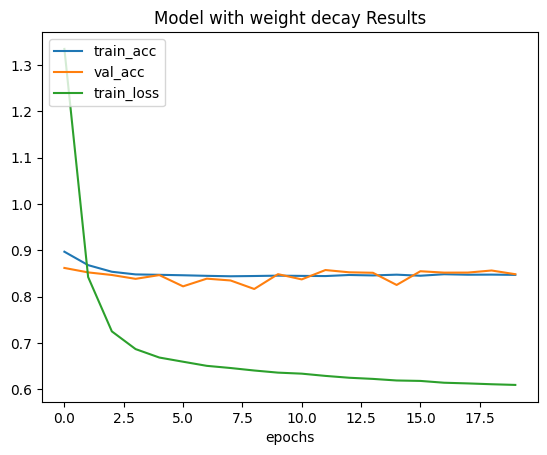

In [5]:
#********************************************************************
#Model 2(Weight Decay) with preloaded weights from saved base model

model_weightdecay.load_weights('BaseModel.params')

model_weightdecay.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

history = model_weightdecay.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Model with weight decay Results')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')
plt.show()

Epoch 1/20
3125/3125 [==============================] - 6s 2ms/step - loss: 0.4612 - accuracy: 0.8413 - val_loss: 0.3401 - val_accuracy: 0.8773
Epoch 2/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.4013 - accuracy: 0.8619 - val_loss: 0.3325 - val_accuracy: 0.8804
Epoch 3/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.3780 - accuracy: 0.8699 - val_loss: 0.3302 - val_accuracy: 0.8836
Epoch 4/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.3626 - accuracy: 0.8746 - val_loss: 0.3468 - val_accuracy: 0.8790
Epoch 5/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.3526 - accuracy: 0.8782 - val_loss: 0.3252 - val_accuracy: 0.8850
Epoch 6/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.3437 - accuracy: 0.8809 - val_loss: 0.3268 - val_accuracy: 0.8842
Epoch 7/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.3370 - accuracy: 0.8816 - val_loss: 0.3225 - val_accuracy:

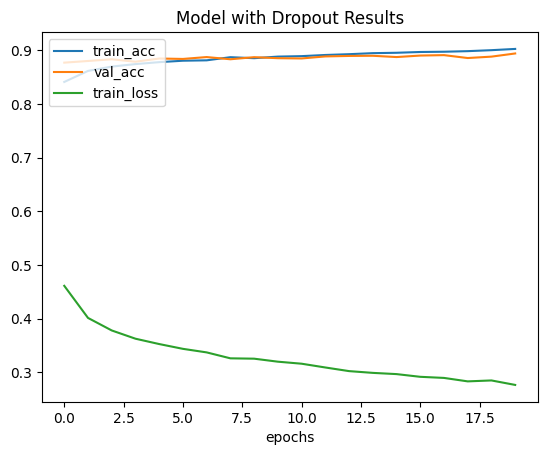

In [6]:
#************************************************************************
#Model 3 (Dropout) with preloaded weights from saved base model
model_dropout.load_weights('BaseModel.params')

model_dropout.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

history = model_dropout.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Model with Dropout Results')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')
plt.show()


average validation log mse = 0.12446559749543666


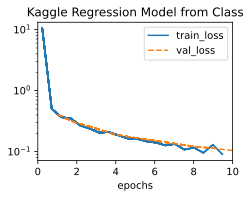

In [7]:
#PART 2
#************************************************************************
#Code from book: for reference on my own model

class KaggleHouse(d2l.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            self.raw_train = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_train.csv', self.root,
                sha1_hash='585e9cc93e70b39160e7921475f9bcd7d31219ce'))
            self.raw_val = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_test.csv', self.root,
                sha1_hash='fa19780a7b011d9b009e8bff8e99922a8ee2eb90'))

data = KaggleHouse(batch_size=32)
print(data.raw_train.shape)
print(data.raw_val.shape)

@d2l.add_to_class(KaggleHouse)
def preprocess(self):
    # Remove the ID and label columns
    label = 'SalePrice'
    features = pd.concat(
        (self.raw_train.drop(columns=['Id', label]),
         self.raw_val.drop(columns=['Id'])))
    # Standardize numerical columns
    numeric_features = features.dtypes[features.dtypes != 'object'].index
    features[numeric_features] = features[numeric_features].apply(
        lambda x: (x - x.mean()) / (x.std()))
    # Replace NAN numerical features by 0
    features[numeric_features] = features[numeric_features].fillna(0)
    # Replace discrete features by one-hot encoding.
    features = pd.get_dummies(features, dummy_na=True)
    # Save preprocessed features
    self.train = features[:self.raw_train.shape[0]].copy()
    self.train[label] = self.raw_train[label]
    self.val = features[self.raw_train.shape[0]:].copy()

data.preprocess()
print(data.train.shape)


@d2l.add_to_class(KaggleHouse)
def get_dataloader(self, train):
    label = 'SalePrice'
    data = self.train if train else self.val
    if label not in data: return
    get_tensor = lambda x: tf.constant(x.values, dtype=tf.float32)
    # Logarithm of prices
    tensors = (get_tensor(data.drop(columns=[label])),  # X
               tf.reshape(tf.math.log(get_tensor(data[label])), (-1, 1)))  # Y
    return self.get_tensorloader(tensors, train)

def k_fold_data(data, k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j * fold_size, (j+1) * fold_size)
        rets.append(KaggleHouse(data.batch_size, data.train.drop(index=idx),
                                data.train.loc[idx]))
    return rets

def k_fold(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = d2l.LinearRegression(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models


trainer = d2l.Trainer(max_epochs=10)
models = k_fold(trainer, data, k=5, lr=0.01)
plt.title("Kaggle Regression Model from Class")
plt.xlabel("epochs")
plt.show() #Shows plot of original model that we used in class


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
average validation log mse = 0.02859806062653661


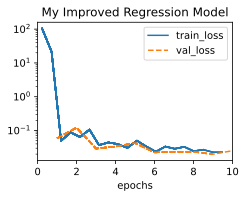

In [8]:
#**********************************************************************************88
#My more complex defined model uses a fully connected netwoork with 3 hidden layers
class MyModel(d2l.Module):  #@save
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        initializer = tf.initializers.RandomNormal(stddev=0.01)
        strategy = tf.distribute.MirroredStrategy()
        with strategy.scope():
            self.net = tf.keras.Sequential([
                tf.keras.layers.Dense(256, kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dense(128, kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dense(64, kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dense(1, kernel_initializer=initializer)])
    def forward(self, X):
        return self.net(X)

    def loss(self, y_hat, y):
        fn = tf.keras.losses.MeanSquaredError()
        return fn(y, y_hat)

    def configure_optimizers(self):
        return tf.keras.optimizers.SGD(self.lr)

#new k-fold function calling my new model
def new_k_fold(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = MyModel(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models

trainer = d2l.Trainer(max_epochs=10)
models = new_k_fold(trainer, data, k=5, lr=0.01)
plt.title("My Improved Regression Model")
plt.xlabel("epochs")
plt.show() #plot of my models performance

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
average validation log mse = 0.034137559775263074


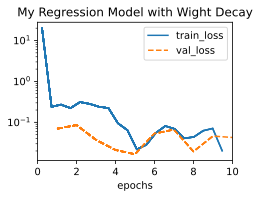

In [9]:
#*******************************************************************************************
#Trying the regression with a model using weight decay.

class MyModelWeightDecay(d2l.Module):  #@save
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        initializer = tf.initializers.RandomNormal(stddev=0.01)
        strategy = tf.distribute.MirroredStrategy()
        with strategy.scope():
            self.net = tf.keras.Sequential([
                tf.keras.layers.Dense(256, kernel_regularizer='l2', kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dense(128, kernel_regularizer='l2', kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dense(64, kernel_regularizer='l2', kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dense(1, kernel_initializer=initializer)])
    def forward(self, X):
        return self.net(X)

    def loss(self, y_hat, y):
        fn = tf.keras.losses.MeanSquaredError()
        return fn(y, y_hat)

    def configure_optimizers(self):
        return tf.keras.optimizers.SGD(self.lr)

#new k-fold function calling my new model
def new_k_fold_WeightDecay(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = MyModelWeightDecay(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models

trainer = d2l.Trainer(max_epochs=10)
models = new_k_fold_WeightDecay(trainer, data, k=5, lr=0.1)
plt.title("My Regression Model with Wight Decay")
plt.xlabel("epochs")
plt.show()


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
average validation log mse = 0.03879888780415058


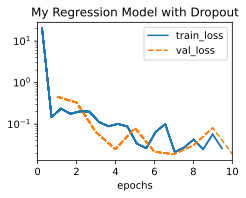

In [10]:
#*******************************************************************************************
#Trying the regression with a model using dropout.

class MyModelDropout(d2l.Module):  #@save
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        initializer = tf.initializers.RandomNormal(stddev=0.01)
        strategy = tf.distribute.MirroredStrategy()
        with strategy.scope():
            self.net = tf.keras.Sequential([
                tf.keras.layers.Dense(256, kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Dense(128, kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dropout(0,3),
                tf.keras.layers.Dense(64, kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Dense(1, kernel_initializer=initializer)])
    def forward(self, X):
        return self.net(X)

    def loss(self, y_hat, y):
        fn = tf.keras.losses.MeanSquaredError()
        return fn(y, y_hat)

    def configure_optimizers(self):
        return tf.keras.optimizers.SGD(self.lr)

#new k-fold function calling my new model
def new_k_fold_Dropout(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = MyModelDropout(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models

trainer = d2l.Trainer(max_epochs=10)
models = new_k_fold_Dropout(trainer, data, k=5, lr=0.1)
plt.title("My Regression Model with Dropout")
plt.xlabel("epochs")
plt.show()
